In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from azureml.core.dataset import Dataset
from azureml.core.workspace import Workspace
from sklearn.model_selection import train_test_split

In [61]:
# Create workspace object
ws = Workspace.from_config()

In [62]:
# Set pandas options to be able to display all columns
pd.set_option("display.max_columns", 25)

In [63]:
# Read in source data
df = pd.read_csv("./data/raw/attrition.csv")

In [64]:
# Split data into train and test set and store in separate files
train_df = df.iloc[:int(0.8*len(df)),] # 80% of the data goes into training
test_df = df.iloc[int(0.8*len(df)):,] # 20% is set aside for testing
train_df.to_csv("./data/attrition_train.csv", index=False)
test_df.to_csv("./data/attrition_test.csv", index=False)

In [65]:
# Validate shapes of splitted data
print(train_df.shape)
print(test_df.shape)

(1176, 35)
(294, 35)


In [66]:
# Get the default datastore to upload data
datastore = ws.get_default_datastore()

# Upload the local files from src_dir to the target_path in datastore
datastore.upload(src_dir="./data", target_path="data")

# Create datasets referencing the cloud location of the training and test csv files
train_dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, ("data/attrition_train.csv"))])
test_dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, ("data/attrition_test.csv"))])

Uploading an estimated of 3 files
Target already exists. Skipping upload for data/attrition_test.csv
Target already exists. Skipping upload for data/attrition_train.csv
Target already exists. Skipping upload for data/raw/attrition.csv
Uploaded 0 files


In [67]:
# Register the training dataset
train_dataset = train_dataset.register(
    workspace=ws,
    name="attrition_train",
    description="This dataset contains the training part of the IBM HR Analytics Employee Attrition & Performance data from Kaggle."
)

# Register the testing dataset
test_dataset = test_dataset.register(
    workspace=ws,
    name="attrition_test",
    description="This dataset contains the testing part of the IBM HR Analytics Employee Attrition & Performance data from Kaggle."
)

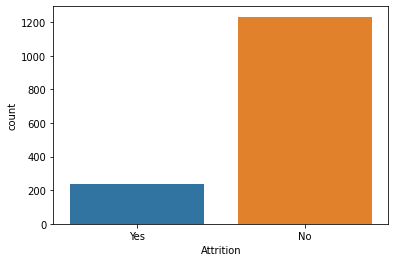

In [59]:
# Check for class imbalance
sns.countplot(x="Attrition", data=df)